In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
data = pd.read_csv('./Dataset/process_data.csv')

In [3]:
data.head()

,ID,Education,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,Country,Customer_Days,Family,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,3,84835.0,189,104,379,111,189,218,1,SP,13,1,1190,14,1
1,1,3,57091.0,464,5,64,7,0,37,1,CA,14,1,577,17,2
2,10476,3,67267.0,134,11,59,15,2,30,1,US,47,3,251,10,0
3,1386,3,32474.0,10,0,1,0,0,0,1,AUS,49,4,11,3,0
4,5371,3,21474.0,6,16,24,11,0,34,2,SP,82,2,91,6,2


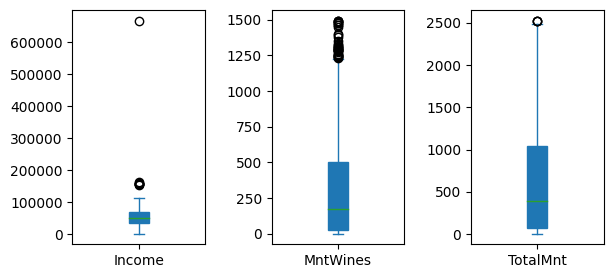

In [4]:

X = data[['Income', 'MntWines', 'TotalMnt']]

X.plot(subplots=True, layout=(4,5), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

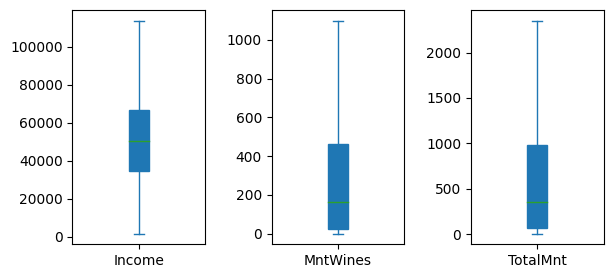

In [5]:
X = X[X['Income'] <= 150000].reset_index(drop=True)
X = X[X['MntWines'] <= 1100].reset_index(drop=True)
X = X[X['TotalMnt'] <= 2500].reset_index(drop=True)
X.plot(subplots=True, layout=(4,5), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

Standardize Features

c:\Users\thota\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\thota\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\thota\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\thota\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\

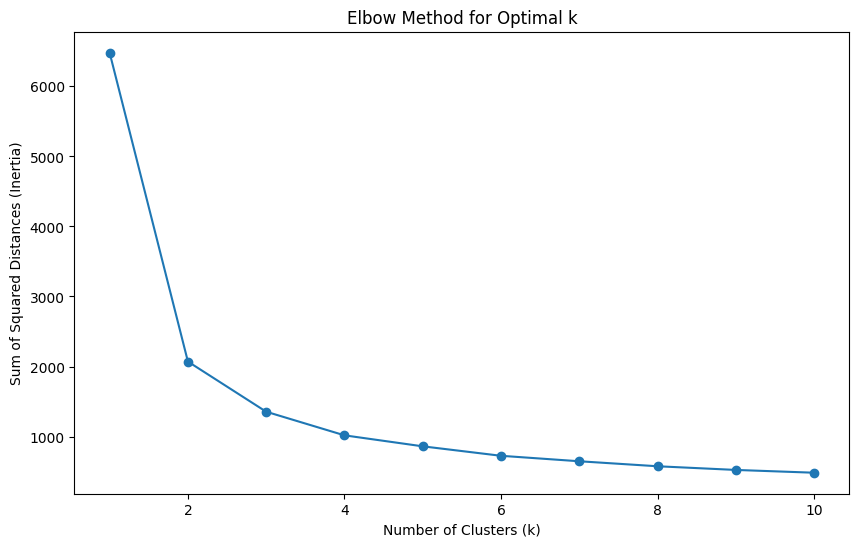

In [6]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#X_scaled = X
# List to store inertia (sum of squared distances) for different values of k
inertia = []

# Range of clusters to try
clusters_range = range(1, 11)

# Perform k-means clustering for each value of k
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

In [7]:
# choosing 2 clusters by understanding elbow method plot

kmeans = KMeans(n_clusters=2, random_state=42)
customer_clusters = kmeans.fit_predict(X_scaled)

c:\Users\thota\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


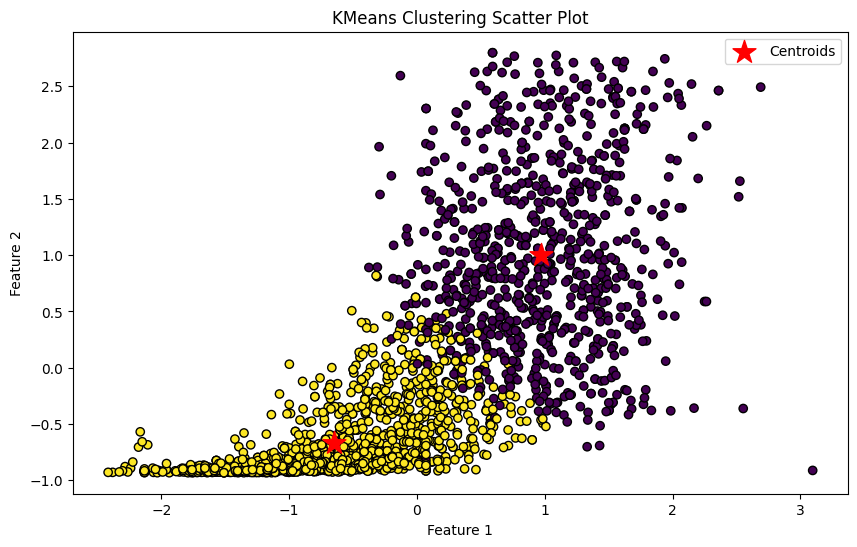

In [8]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))

# Assuming X has three features for simplicity (you can modify as per your dataset)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=customer_clusters, cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')

plt.title('KMeans Clustering Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Evaluation Metrics

In [9]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 2070.866491091141


In [10]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, customer_clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5829788869089481


### Inertia: 2070.8665
### Silhouette Score: 0.5829
### Number of Clusters: 2

## Interpretation:
### - An Inertia value of 2070.8665 gives an indication of how compact the clusters are.
###   Lower Inertia values suggest denser, more cohesive clusters.
### - A Silhouette Score of 0.5829 indicates a good separation between the clusters.
###   The score ranges from -1 to 1, where higher values indicate better-defined clusters.

## Conclusion:
### - 'The K-Means clustering model with 2 clusters performs well based on both the Inertia and Silhouette Score.
### - The Inertia value suggests that the clusters are relatively compact.
### - The Silhouette Score indicates a good separation between the clusters.
'